# Download Required Packages

In [2]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parse Dataset

In [55]:
temp_data = np.genfromtxt('./CollectedData.tsv', delimiter='\t', dtype='float')
temp_data = np.delete(temp_data, 0, 0)
temp_stringData = np.genfromtxt('./CollectedData.tsv', delimiter='\t', dtype=str)
temp_stringData = np.delete(temp_stringData, 0, 0)

x_index = 18
y_index = 14

data = []
stringData = []

for d, str_d in zip(temp_data, temp_stringData):
    if d[x_index] > 0 and d[y_index] > 0 and str_d[15] == "Single Family":
        data.append(d)
        stringData.append(str_d)
data = np.array(data)

# Plot Sqft Area vs Price

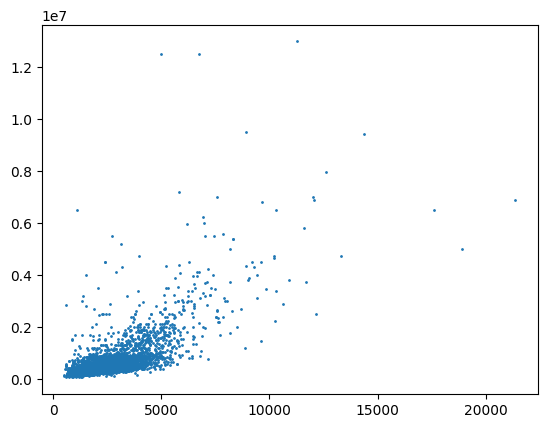

In [56]:
plt.scatter(data[:, x_index], data[:, y_index], s=1)

# Run 2D Gradient Descent Algo

[0/15]: x0 = 0.023286225737462897 x1=240.85602230385945


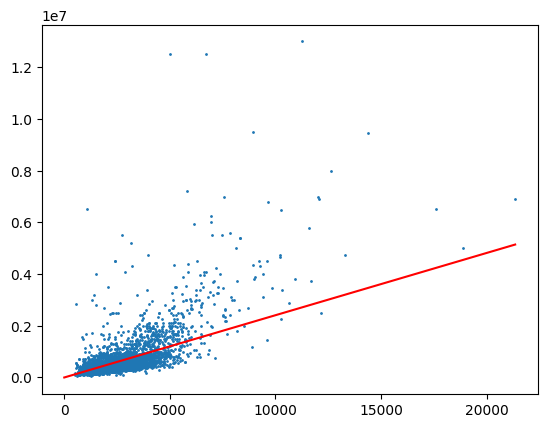

[1/15]: x0 = -0.029795572900783492 x1=241.8923193939148


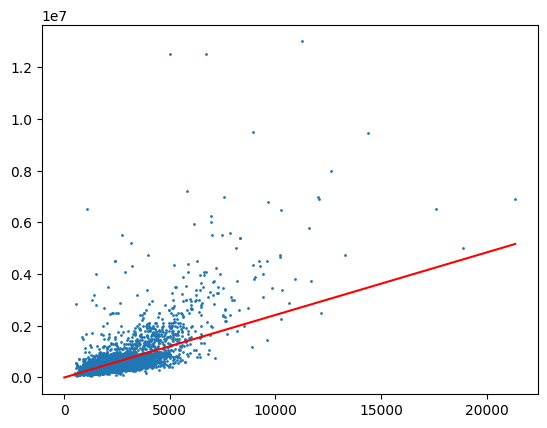

[2/15]: x0 = -0.08320593612208056 x1=241.89679618955563


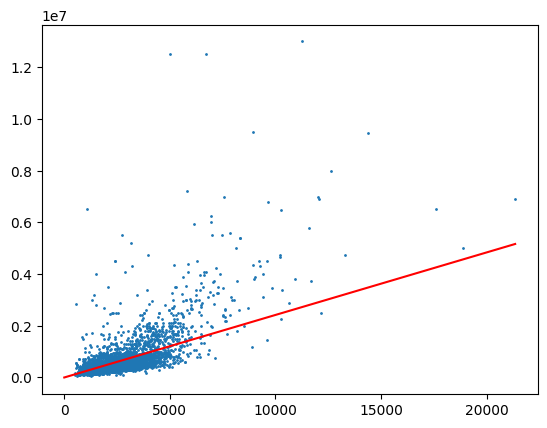

[3/15]: x0 = -0.13661770544219476 x1=241.89683359590228


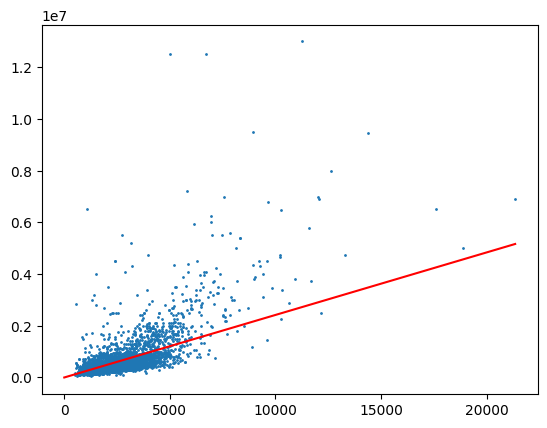

[4/15]: x0 = -0.19002947326730774 x1=241.89685190184994


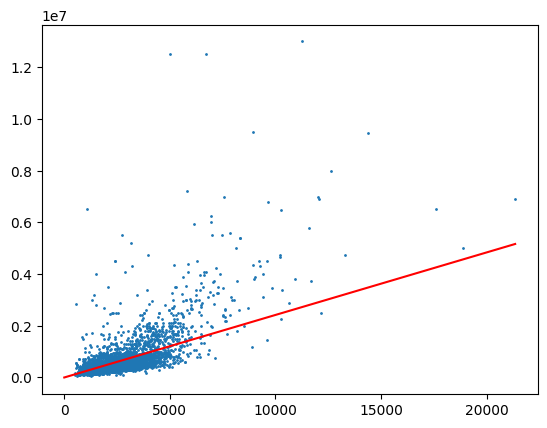

[5/15]: x0 = -0.24344123354127006 x1=241.89687012561512


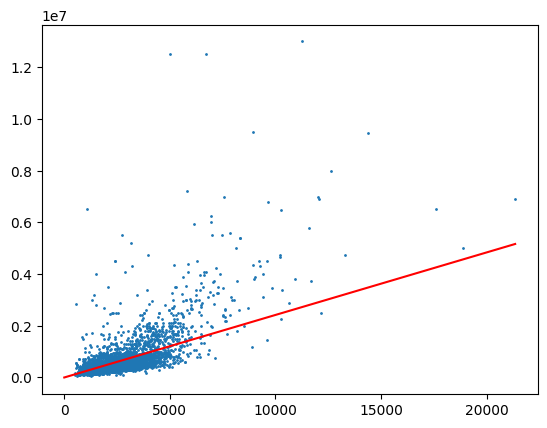

[6/15]: x0 = -0.2968529862380274 x1=241.89688834902503


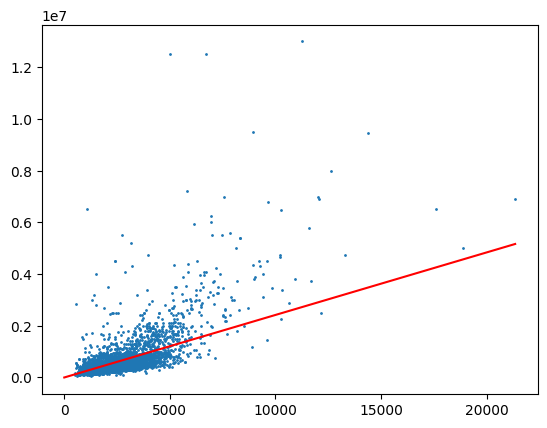

[7/15]: x0 = -0.3502647313574674 x1=241.89690657242988


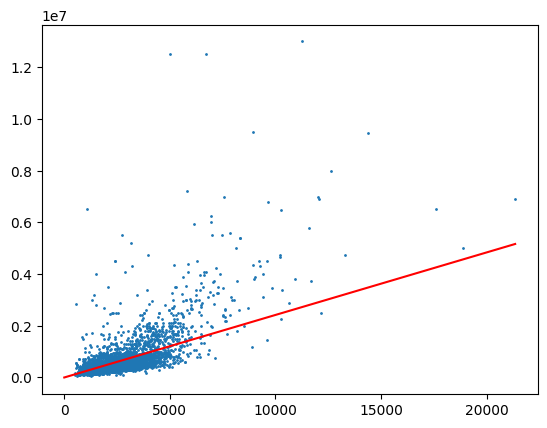

[8/15]: x0 = -0.4036764688995952 x1=241.89692479583317


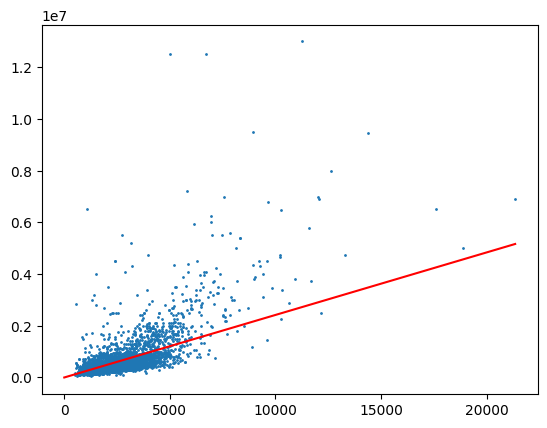

[9/15]: x0 = -0.4570881988644066 x1=241.89694301923302


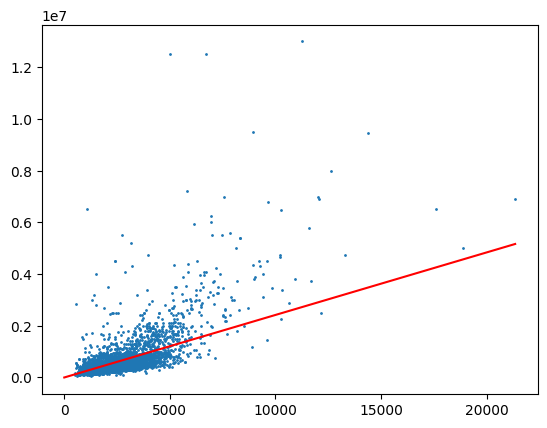

[10/15]: x0 = -0.5104999212519047 x1=241.8969612426306


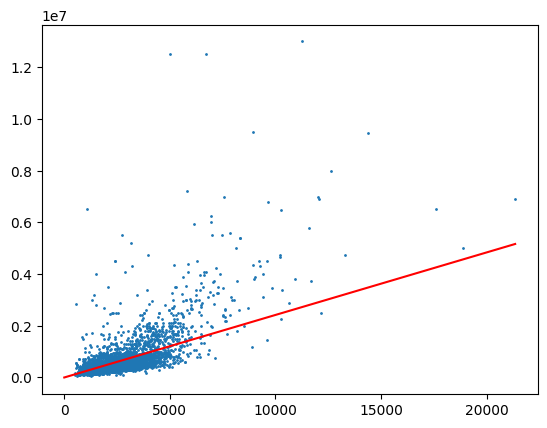

[11/15]: x0 = -0.5639116360620916 x1=241.89697946602533


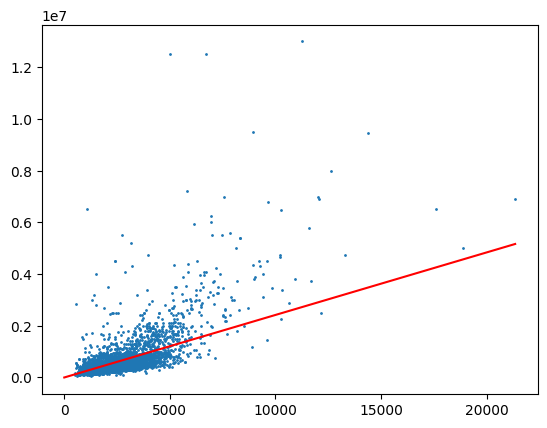

[12/15]: x0 = -0.6173233432949672 x1=241.8969976894182


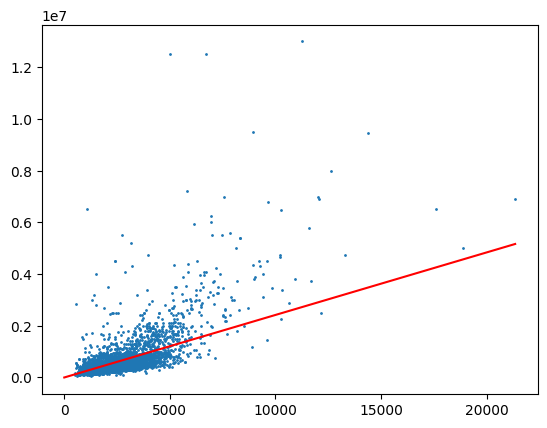

[13/15]: x0 = -0.670735042950529 x1=241.89701591280766


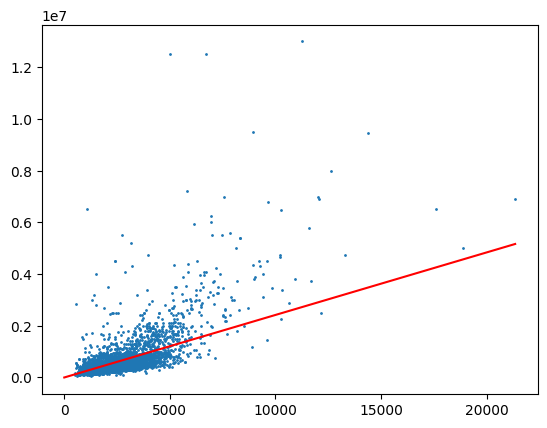

[14/15]: x0 = -0.7241467350287802 x1=241.89703413619463


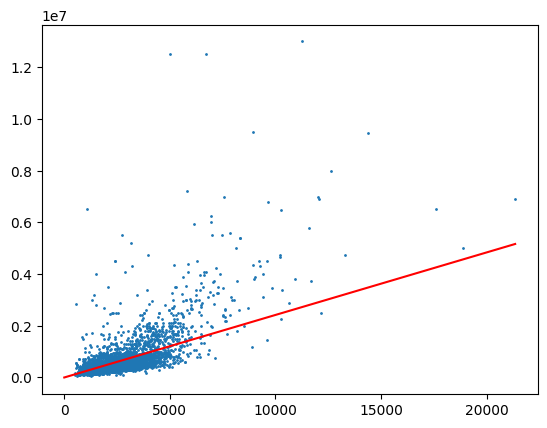

theta_0:  [-0.72414674]
theta_1:  [241.89703414]


In [58]:
placeholder_x = np.arange(np.amax(data[:,x_index]))

def sgd(data, training_rate=0.0000000001, iters=15):
    theta = np.array([[0],[0]])
    X = data[:, [x_index]].astype(int)
    X_1 = np.ones(X.shape, dtype=X.dtype)
    X = np.hstack((X_1, X))
    Y = data[:, [y_index]].T[0].astype(int)

    for _ in range(iters):
        for x, y in zip(X, Y):
            h_x = np.matmul(theta.T, x)
            x = np.reshape(x, theta.shape)
            theta = theta - training_rate * (h_x - y) * x

        print(f'[{_}/{iters}]: x0 = {theta[0,0]} x1={theta[1,0]}')
        # plot charts
        plt.scatter(data[:, x_index], data[:, y_index], s=1)
        plt.plot(placeholder_x, theta[1,0]*placeholder_x + theta[0,0], color='red')
        plt.show()

    return theta


theta = sgd(data)
print("theta_0: ", theta[0])
print("theta_1: ", theta[1])


In [59]:
X = data[:, x_index]
Y = data[:, y_index]

i = 0
errors = []
for x, y in zip(X,Y):
    y_pred = theta[0] + theta[1] * x
    error = y - y_pred
    errors.append((error[0], i, x, y, y_pred[0], stringData[i][0]))
    i += 1

errors.sort()

print('i', '\t', 'error', '\t\t\t', 'x', '\t\t', 'y', '\t\t', 'y_pred', '\t\t', 'address')
for listing in errors:
    print(listing[1], '\t', listing[0], '\t', listing[2], '\t', listing[3], '\t', listing[4], '\t', listing[5])


i 	 error 			 x 		 y 		 y_pred 		 address
494 	 -980288.7610294654 	 7153.0 	 750000.0 	 1730288.7610294654 	 7707 Shelburne Cir
285 	 -972077.3508461285 	 8876.0 	 1175000.0 	 2147077.3508461285 	 9102 Cypresswood Dr
6494 	 -874662.1857655509 	 9606.0 	 1449000.0 	 2323662.185765551 	 3918 Lake Star Dr
2302 	 -832464.6647771767 	 5095.0 	 400000.0 	 1232464.6647771767 	 8222 Howard Dr
221 	 -799523.6798858256 	 4483.0 	 284900.0 	 1084423.6798858256 	 806 Shadow Ln
1672 	 -798873.3888957009 	 4952.0 	 399000.0 	 1197873.388895701 	 5207 Braesheather Dr
1558 	 -792440.8259416174 	 5715.0 	 590000.0 	 1382440.8259416174 	 17503 Hidden Forest Cir
1559 	 -792440.8259416174 	 5715.0 	 590000.0 	 1382440.8259416174 	 17503 Hidden Forest Cir
3513 	 -783753.0475406535 	 3887.0 	 156500.0 	 940253.0475406535 	 11928 Segrest Dr
5550 	 -756243.260188716 	 5400.0 	 550000.0 	 1306243.260188716 	 Tract 3 Bobville Rd
1337 	 -754529.6172124518 	 6426.0 	 799900.0 	 1554429.6172124518 	 11822 Primwoo